# Project: Classification - Loan Eligibility Prediction

----------------
## Context: 
----------------

Credit risk is the risk of loss resulting from the failure by a borrower to repay the principal and interest owed to the lender. The lender uses the interest payments from the loan to compensate for the risk of potential losses. When the borrower defaults on his/her obligations, it causes an interruption in the cash flow of the lender.

In the banking sector, this is an important factor to be considered before approving the loan of an applicant in order to cushion the lender from loss of cash flow and reduce the severity of losses. 

------------------
## Objective:
------------------

Easy House is a finance company that deals in several varieties of home loans. They have a presence across urban, semi-urban, and rural areas. Currently, the customer first applies for a home loan post which the company validates the customer's eligibility for that loan. 

Now, the company wants to automate the loan eligibility process. They want to harness their past customers' data to build a model to predict whether the loan should be approved or not. This would help the company prevent potential losses, save time and focus more on eligible customers.

--------------------------
## Data Dictionary:
--------------------------

The data contains the following attributes:

* **Loan_ID**: Unique Loan ID
* **Gender**: Gender of the applicant - Male/Female
* **Married**: Whether the applicant is married or not (Yes/No)
* **Dependents**: Number of dependents of the applicant
* **Education**: Applicant's education (Graduate/Not Graduate)
* **Self_Employed**: Whether the applicant is self-employed (Yes/No)
* **ApplicantIncome**: The income of the applicant (\$)
* **CoapplicantIncome**: The co-applicant's income in case of a joint loan and 0 otherwise (\$)
* **LoanAmount**: Loan amount (dollars in thousands) 
* **Loan_Amount_Term**: Term of loan in months
* **Credit_History**: Whether the applicant's credit history meets required guidelines
* **Property_Area**: The area the property pertaining to the loan belongs to - Urban/Semi-Urban/Rural
* **Loan_Status**: Loan approved (1 - Yes, 0 - No)

## Importing necessary libraries and overview of the dataset

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To scale the data using z-score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(11.7,8.27)})
from scipy.stats import shapiro


#### Loading data

In [97]:
data = pd.read_csv("CreditRisk.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


#### Check the info of the data

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [99]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349,360.0,1.0,Semiurban,0


**Observations:**

- There are 614 observations and 13 columns in the data.
- ApplicantIncome, CoapplicantIncome, Loan_Amount_Term, Credit_History, and Loan_Status are numeric data types. The rest of the variables are of the object data type.
- There are several columns with less than 614 non-null entries i.e. these columns have missing values.
- Loan_ID column is an identifier. Let's check if each entry of the column is unique.

In [100]:
data.Loan_ID.nunique()

614

**Observations:**
- We can see that all the entries of this column are unique. Hence, this column would not add any value to our analysis. 
- Let's drop this column.

## Exploratory Data Analysis and Data Preprocessing

#### Dropping Loan_ID column

In [101]:
data.drop(columns=['Loan_ID'], inplace=True)

#### Summary Statistics for numerical columns

In [102]:
#Creating a list of numerical columns
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


# print summary statistics 
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0


ApplicantIncome
Skew : 6.54
Mean: 5403.46 | Median: 3812.5 | 2nd Qrt: 2877.5 | 3rd Qrt: 5795.0
Stdev: 6109.04
p-value: 0.0, stat: 0.471 and probably NOT Gaussian 


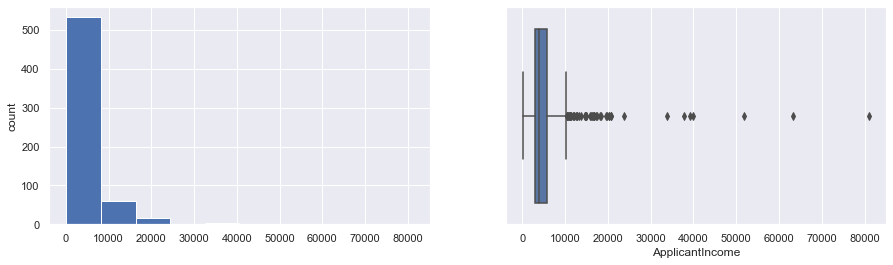

CoapplicantIncome
Skew : 7.49
Mean: 1621.25 | Median: 1188.5 | 2nd Qrt: 0.0 | 3rd Qrt: 2297.25
Stdev: 2926.25
p-value: 0.0, stat: 0.482 and probably NOT Gaussian 


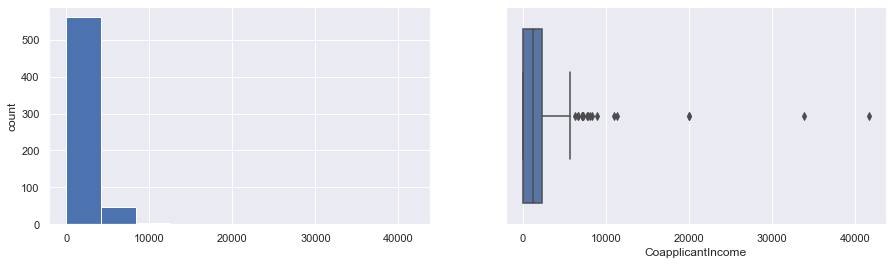

LoanAmount
Skew : 2.36
Mean: 141.17 | Median: 125.0 | 2nd Qrt: 98.0 | 3rd Qrt: 164.75
Stdev: 88.34
p-value: 0.0, stat: 0.806 and probably NOT Gaussian 


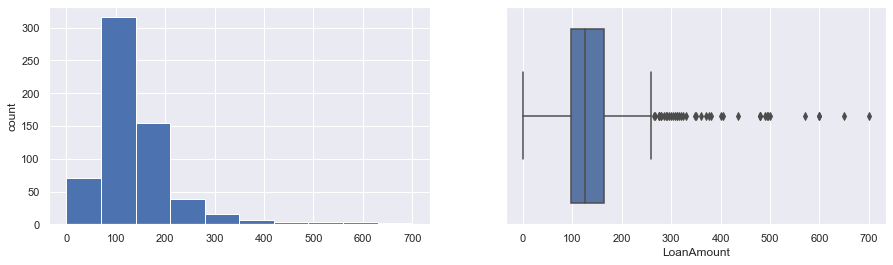

Loan_Amount_Term
Skew : -2.36
Mean: 342.0 | Median: 360.0 | 2nd Qrt: 360.0 | 3rd Qrt: 360.0
Stdev: 65.12
p-value: 1.0, stat: nan and probably Gaussian 


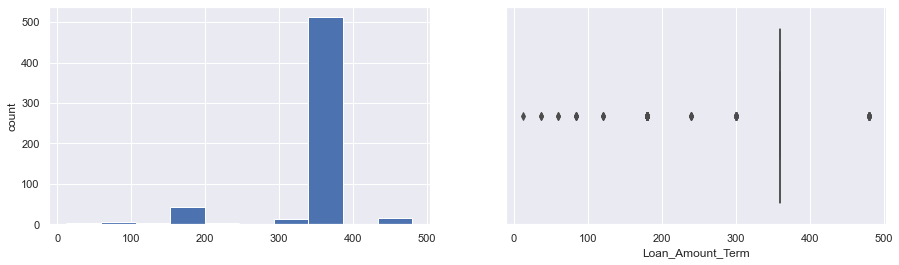

In [103]:
def fn_guassian(dataIN):
    
    stat, p = shapiro(dataIN)
    stat = round(stat,3)
    p = round(p,3)
    normtxt = 'probably NOT Gaussian'
    if p > .05:
        normtxt = 'probably Gaussian'
    print(f'p-value: {p}, stat: {stat} and {normtxt} ')

df = data
for col in df[num_cols].columns:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist()
    print(f'Mean: {round(df[col].mean(),2)} | Median: {df[col].median()} | 2nd Qrt: {df[col].quantile(0.25)} | 3rd Qrt: {df[col].quantile(0.75)}')
    print(f'Stdev: {round(df[col].std(),2)}')
    
    fn_guassian(df[col])
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

**Observations:__________**

Jose Medina Observations
> - 'ApplicantIncome' is skewed left - with many outliers on the higher end. **Mean: 5403.46 | Median: 3812.5**
> - 'CoapplicantIncome' is skewed left - with many outliers on the higher end. **Mean: 1621.25 | Median: 1188.5**
> - 'LoanAmount' is more evenly distributed with **Mean: 141.17 | Median: 125.0**
> - 'Loan_Amount_Term' reveals that most people opt for the 30 yr term, with the next biggest preference being 15 year, then a few unique others that occur less frequently. **Mean: 28.5 | Median: 30.0**


#### Feature Engineering

In [104]:
#Converting the scale of loan term from months to years
data['Loan_Amount_Term']=data['Loan_Amount_Term']/12

In [105]:
#Adding the applicant and co-applicant income to get the total income per application
data['total_income']=data['ApplicantIncome'] + data['CoapplicantIncome']

In [106]:
#Dropping the columns as we created a new column which captures the same information
data.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)

#### Check the distribution and outliers for each column in the data

LoanAmount
Skew : 2.36


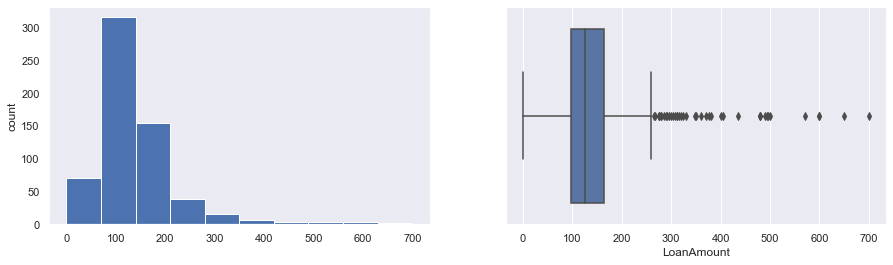

total_income
Skew : 5.63


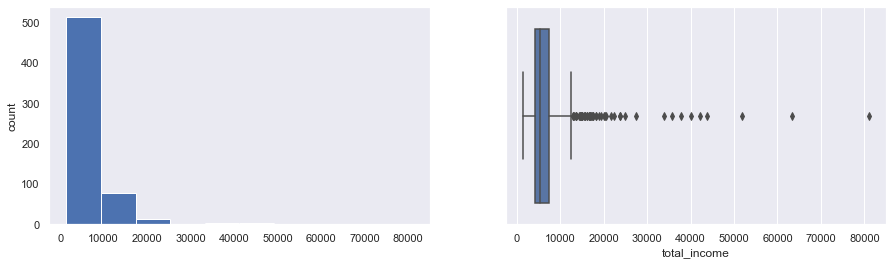

In [107]:
for col in ['LoanAmount', 'total_income']:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observations:**

- Both the variables are highly skewed to the right and have many outliers which can be expected as the data contains different types of areas - Rural, Urban & Semi-Urban. 
- We can observe from the histogram that majority of values for total income are less than 10,000K dollars.

Now, let's check the percentage of observations in each category for all the categorical variables.

#### Checking percentage of each category for categorical variables

In [108]:
#Creating list of categorical columns
cat_col= ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History','Property_Area', 'Loan_Status']

for col in cat_col:
    print(data[col].value_counts() / len(data)) #Write your code here
    print('*'*40)                #Print the * 40 times to separate different variables

Male      0.796417
Female    0.182410
Name: Gender, dtype: float64
****************************************
Yes    0.648208
No     0.346906
Name: Married, dtype: float64
****************************************
0     0.561889
1     0.166124
2     0.164495
3+    0.083062
Name: Dependents, dtype: float64
****************************************
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64
****************************************
No     0.814332
Yes    0.133550
Name: Self_Employed, dtype: float64
****************************************
1.0    0.773616
0.0    0.144951
Name: Credit_History, dtype: float64
****************************************
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64
****************************************
1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64
****************************************


**Observations:___________**

Jose Medina Observations

> - Gender: males represents a majority (79.6%)
> - Married: married represents a majority (64.8%)
> - Dependents: 0 depends represents majority (56.2%), with roughly even representation in 1 (16.6%) and 2 (16.4%) dependents, and slightly less for 3+ dependants (8.3%)
> - Graduate: graduate represents a majority (78.1%)
> - Self-employed: most applicants are NOT self-employeed (self-employed=No is 81.4%)
> - Credity History: most applicants (77%) meet the required Credit_History guidelines (Credit_History=1)
> - Property_Area is relatively evently distributed among the 3 possible values - with ~38% Semiurban, ~33% for Urban, and ~29% for Rural
> - Loan_Status = 1 (approved) is a majority (~68.7%)

#### Imputing missing values

In [109]:
#Imputing missing values with mode for the categorical variables 
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
    data[col].fillna(value=data[col].mode()[0], inplace=True)

In [110]:
#Replacing 0's with null values in loan amount 
data.LoanAmount.replace(0, np.nan, inplace=True)

#Imputing null values in loan amount with the median
data.LoanAmount.fillna(value=data.LoanAmount.median(), inplace=True)

**We are done with the data preprocessing. Let's explore the data a bit more with bivariate analysis.**

Let's check the relationship of loan amount with the total income.

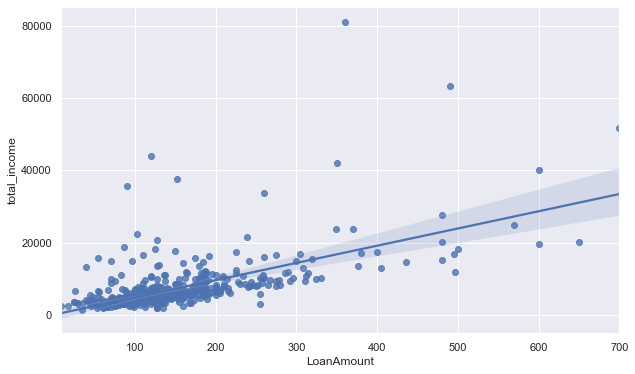

In [111]:
plt.figure(figsize=(10,6))
sns.regplot(x='LoanAmount', y='total_income', data=data)
plt.show()

**Observations:**
- The plot shows that the loan amount is positively correlated with total income. This implies that the loan amount for higher-income applicants is progressively higher.
- There are some outliers visible, showing applicants with low income having been given loans of a higher amount.

Let's check the relationship of total income with loan status

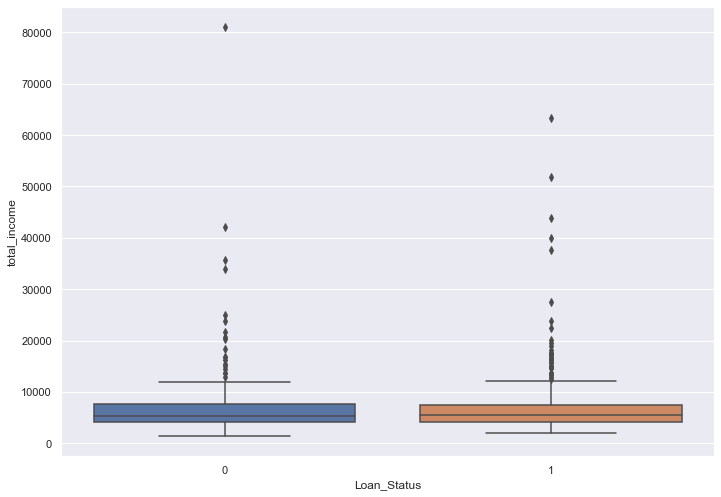

In [112]:
sns.boxplot(x=data.Loan_Status, y=data.total_income)
plt.show()

**Observations:**
- Except for some outliers, there is no major difference between the income of those customers who are eligible versus those who are not. 
- This implies that income alone might not be a good indicator of a customer's loan eligibility.

Let's check how credit history is related to loan status

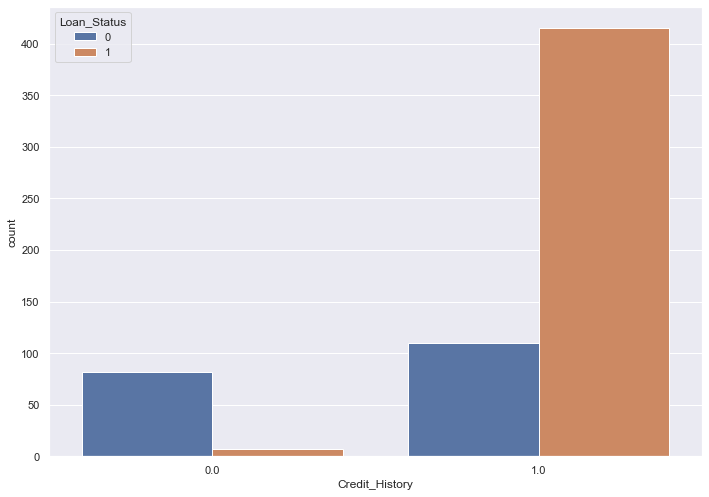

In [113]:
sns.countplot(x=data.Credit_History, hue=data.Loan_Status)
plt.show()

**Observations:**
- The plot shows that credit history is an important factor while checking loan eligibility. There are very few customers whose loan was approved even when their credit history did not meet required guidelines.

Let's check the relationship between education and loan status

<AxesSubplot:xlabel='Education', ylabel='count'>

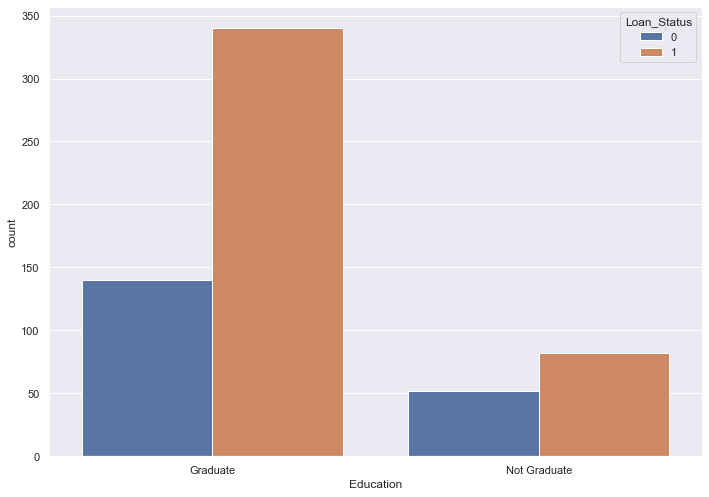

In [114]:
sns.countplot(x=data.Education, hue=data.Loan_Status)

**Observations:**
- We can see that graduate customers are more likely to get loans.
- This might be because, in general, graduate customers have higher income when compared to non-graduates. Let's check if this is true.

<AxesSubplot:xlabel='Education', ylabel='total_income'>

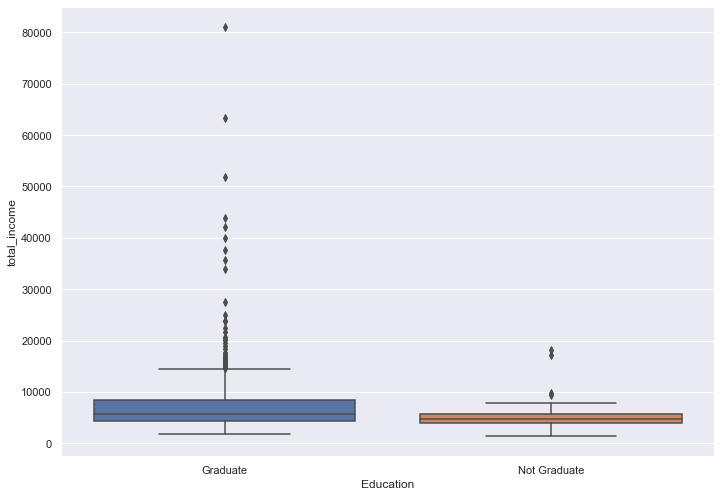

In [115]:
sns.boxplot(x=data.Education, y=data.total_income)

**Observations:**
- We can see that this does appear to be true; graduate customers seem to earn more on average.

Let's check how property area is related with loan status

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

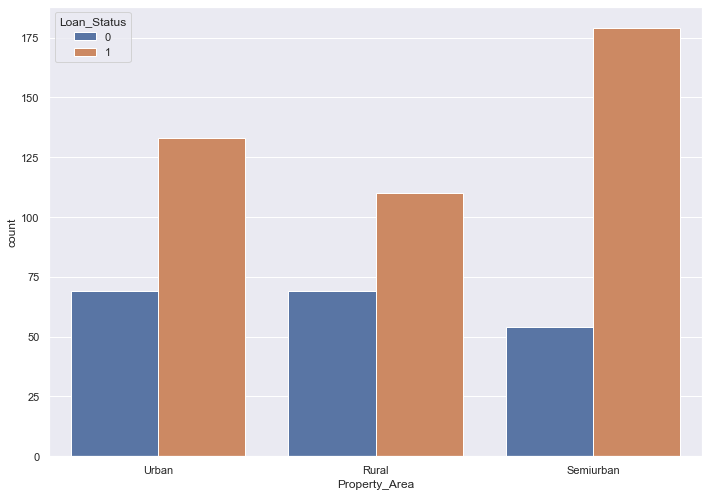

In [116]:
sns.countplot(x=data.Property_Area, hue=data.Loan_Status)

**Observations:**

- The plot shows that more loans are approved for properties in semi-urban areas. 
- This could be due to several reasons. The bank might be charging higher interest rates for semi-urban areas or the current customer base of the company from semi-urban areas might actually be more eligible for home loans based on loan applicant features. We cannot be certain as we don't have the data to support this claim.

**Now that we have processed and explored our data, let's prepare it for modeling.**

## Preparing data for modeling

- Models cannot take non-numeric inputs. So, we will first create dummy variables for all the categorical variables.
- We will then split the data into train and test sets.

In [117]:
#Separating target variable and other variables

X= data.drop(columns=['Loan_Status'])#write your code here
Y= data['Loan_Status']#write your code here

In [118]:
#Creating dummy variables 
#drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first=True)

In [119]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

## Building Classification Models

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem on hand.**

### Model evaluation criterion:

#### Since this is a binary classification problem, the model can make wrong predictions in one of two ways:
1. Predicting a customer is not eligible for a loan when the customer actually is eligible - Loss of opportunity
2. Predicting a customer is eligible for a loan when the customer is actually not - Financial loss

#### Which case is more important? 
* Predicting that the customer is eligible when he is not, because the person might default or not be able to return the loan, which would result in financial loss to the company.

#### How to reduce this loss i.e need to reduce False Negatives?
* In classification, the class of interest is considered the positive class. Here, the class of interest is 0 i.e. identifying non-eligible customers. So, the company wants to minimize the number of false negatives, in other words **Recall** is the evaluation criterion to be maximized.

Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.

In [120]:
#function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Logistic Regression

In [121]:
#define logistic regression model 
log_reg= LogisticRegression(random_state=1)

#fit the model
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=1)

**Let's check the coefficient of each dependent variable in the data**

In [122]:
pd.Series(log_reg.coef_[0], index=X_train.columns).sort_values(ascending=False)

Credit_History             3.026274
Property_Area_Semiurban    0.821581
Married_Yes                0.189397
Dependents_2               0.154733
Dependents_3+              0.113794
total_income              -0.000010
LoanAmount                -0.000475
Property_Area_Urban       -0.006431
Loan_Amount_Term          -0.065875
Self_Employed_Yes         -0.098513
Gender_Male               -0.106018
Dependents_1              -0.145736
Education_Not Graduate    -0.491753
dtype: float64

**Observations:_________**

Jose Medina Observations

> **Some features that positively affect LoanStatus**
> - Credit History (largest coefficient) - this we noted was a prominent feature in the bar charts above - with more loans being approved, generally, when Credit_History met requirements (Credit_History=1)
> - Property_Area_Semiurban - again, this was also noteworth in the bar charts above, and more approved loans seemed to be associated with Semiurban
> - Maried_Yes
> - Dependents_2              
> - Dependents_3+

> **Some features that negatively affect LoanStatus**
> - Loan_Amount_Term
> - Education_Not Graduate
> - Dependents_1  
> - Gender_Male (<-- but we need keep in mind that majority of applicants are male)      
> - Self_Employed_Yes 

In [123]:
odds = np.exp(log_reg.coef_[0]) #finding the odds

#adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False) 

,odds
Credit_History,20.620255
Property_Area_Semiurban,2.274092
Married_Yes,1.208521
Dependents_2,1.167346
Dependents_3+,1.120521
total_income,0.999990
LoanAmount,0.999526
Property_Area_Urban,0.993590
Loan_Amount_Term,0.936248
Self_Employed_Yes,0.906184


**Observations:_____**

Jose Medina Observations

Since the objective is to understand which loans are likely to be approved, we shall focus our observations on a few notable odds for approval of loans are as follows:

**An applicant that has:**
> - the required Credit_History (=1) is 21.3 times more likely to be approved for a loan than those are do NOT have the required credit history, per guidelines.
> - an application for a Semiurban property area is 2.07 times more likely to be approved for a loan than another property area type
> - Married_Yes (married inviduals) are 1.38 times more likely to get approved for a loan than those with other marital status
> - Dependents_2 (applicants with 2 dependants) are 1.22 times more likely to be approved for a loan than other dependent levels


**Now, let's check the performance of the model on the training set**

              precision    recall  f1-score   support

           0       0.91      0.44      0.59       131
           1       0.80      0.98      0.88       298

    accuracy                           0.82       429
   macro avg       0.85      0.71      0.74       429
weighted avg       0.83      0.82      0.79       429



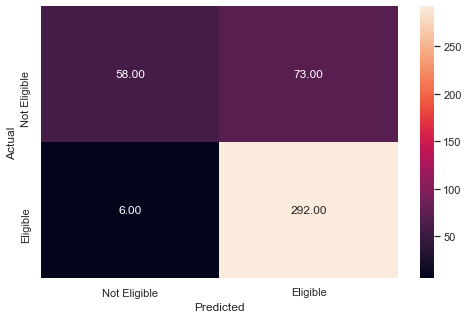

In [124]:
#predict on the training data 
y_pred_train = log_reg.predict(X_train) #Write your code here

# Checking performance on the training data
metrics_score(y_train, y_pred_train)

**Reading confusion matrix (clockwise):**

- **True Positive**: Predicting the customer is not eligible and the customer is actually not eligible
- **False Negative**: Predicting the customer is eligible but the customer is actually not eligible
- **True Negative**: Predicting the customer is eligible and the customer is actually eligible
- **False Positive**: Predicting the customer is not eligible but the customer is actually eligible

**Observations:_____**

Jose Medina Observations:

> - We are getting an accuracy of around 82% on train and test dataset.
> - Our recall is quite high (98%) for class=1 (Loan Approved) which is reflected in the confusion matrix (we caught 292 approve loans out of a total of 298)
> - Precision for class=1 is 80% which is fairly good, though there's room for improvement as in some cases we are still falsely predicting that individuals are eligible when in actuality they are not (73)

**Precision-Recall Curve for Logistic Regression**

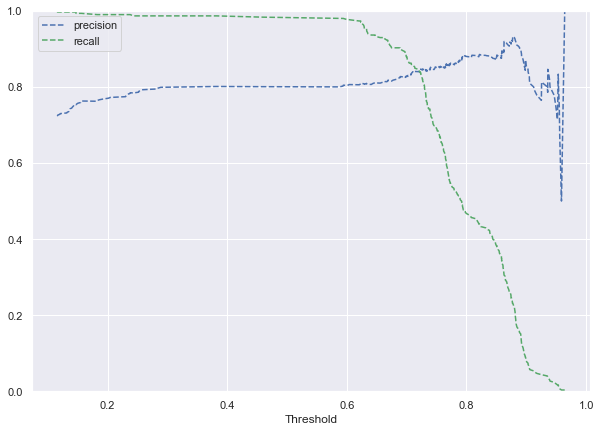

In [125]:
y_scores=log_reg.predict_proba(X_train) #predict_proba gives the probability of each observation belonging to each class

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observations:**
- We can see that precision and recall are balanced for threshold of about 0.7.
- Let's try to calculate the exact threshold where precision and recall are equal.

In [126]:
#calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds)):
    if precisions[i]==recalls[i]:
        print(thresholds[i])

0.7221983510536458


- The threshold of 0.72 would give a balanced precision and recall.
- We can choose the threshold to be a bit higher to make the recall higher but then the precision would drop.
- **This decision depends on the stakeholders and other business driven factors.** For example, if the company can bear the cost of some false positives and be more conservative while approving loans then we can choose for the recall to be higher.
- Let's choose the recall to be 0.75 for the current scenario, since we have mentioned that the company wants to optimize recall.
- **Note:** We also don't want the precision to be so poor that it outweighs the benefits of a higher recall. 

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       131
           1       0.85      0.69      0.76       298

    accuracy                           0.70       429
   macro avg       0.68      0.71      0.68       429
weighted avg       0.75      0.70      0.71       429



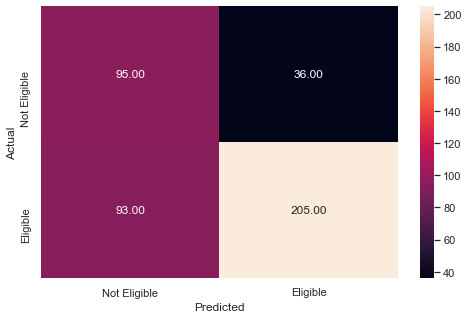

In [127]:
optimal_threshold1 = 0.75
metrics_score(y_train, y_scores[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

           0       0.56      0.66      0.60        61
           1       0.81      0.74      0.78       124

    accuracy                           0.71       185
   macro avg       0.68      0.70      0.69       185
weighted avg       0.73      0.71      0.72       185



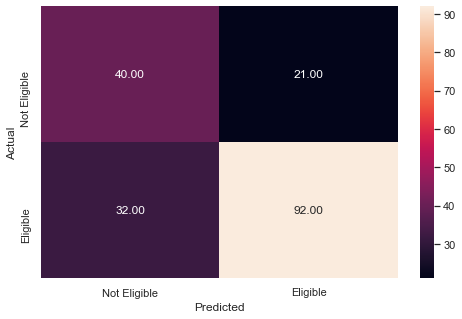

In [128]:
#Checking performance on the testing data
y_pred_test = log_reg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

**Observations:____**

Jose Medina Observations

> Comparing performance on Training Data **BEFORE threshold adjustment** to performance on Training Data **AFTER threshold adjustments** we can observe the following:
> - As we would have expected by observing the ROC curve, after adjusting the threshold to 0.75, we see that we have increased our precision from 80% (for class=1) to 84% and sacrificed recall which has dropped from 98% to 70%.

> Comparing performance on Training Data **AFTER threshold adjustment** to performance on **TEST** Data **AFTER threshold adjustments** we can observe the following:
> - we see that the model performs slightly worse in terms of precision on the TEST data with a precision of 81% (class=1) in TEST vs. 84% in Training. In contrast, recall performed a bit better in TEST (73%) vs. 70% in TRAIN. These results would give us some confidence that the model would perform at this level in production new Loan Application data.

**We cannot yet say, however, if this level of performance is acceptable to the Easy House finance company. Though it appears optimal given the circumstances of the data provided to us, Easy House finance company might be interested in exploring whether additional data sets could offer opportunities to increase recall and precision - as many loans that would have been approved would not be reflected as such - in TEST set 34 (27%) out 124 Eligible Loans would have been flagged as ineligble by our model.**

### K - Nearest Neighbors (KNN)

- KNN is a distance based algorithm and all distance based algorithms are affected by the scale of the data.
- We will scale the attributes (dataframe X defined above) before building the KNN model.

**But before actually building the model, we need to identify the value of K to be used in KNN. We will perform the following steps for the same.**

- For every value of K (from 1 to 20), split the train set into new train and validation set (30 times)
- Scale the training data and validation data
- Take the average of the error on these train and the validation sets for each K
- Plot the average train vs the validation set error for all Ks 
- Choose a suitable K from the plot where the two errors are comparable

In [129]:
knn = KNeighborsClassifier()
ss = StandardScaler()

# We select the best value of k for which the error rate is the least in the validation data
# Let us loop over a few values of the k to determine the best k

train_error = []
test_error = []
knn_many_split = {}

error_df_knn = pd.DataFrame()
features = X.columns

for k in range(1,21):
    train_error = []
    test_error = []
    lista = []
    knn = KNeighborsClassifier(n_neighbors=k)
    for i in range(30):
        x_train_new, x_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size = 0.20)
    
        #let us scale the data
        x_train_new = ss.fit_transform(x_train_new)  #fit_transform the training data
        x_val = ss.transform(x_val) #transform the validation set
        #Fitting knn on training data
        knn.fit(x_train_new, y_train_new)
        #Calculating error on training and validation data
        train_error.append(1 - knn.score(x_train_new, y_train_new)) 
        test_error.append(1 - knn.score(x_val, y_val))
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))
    knn_many_split[k] = lista

knn_many_split

{1: [0.0, 0.27868217054263567],
 2: [0.11671525753158404, 0.3426356589147287],
 3: [0.15753158406219633, 0.23992248062015506],
 4: [0.16297376093294463, 0.26046511627906976],
 5: [0.186977648202138, 0.222093023255814],
 6: [0.18950437317784263, 0.24418604651162787],
 7: [0.19465500485908646, 0.21046511627906975],
 8: [0.18969873663751216, 0.21085271317829468],
 9: [0.19883381924198254, 0.2038759689922481],
 10: [0.1949465500485909, 0.23604651162790702],
 11: [0.19951409135082604, 0.21937984496124036],
 12: [0.1992225461613217, 0.21046511627906966],
 13: [0.2006802721088436, 0.21976744186046512],
 14: [0.1947521865889213, 0.20658914728682173],
 15: [0.20204081632653062, 0.20271317829457375],
 16: [0.1936831875607386, 0.21317829457364343],
 17: [0.2007774538386783, 0.21085271317829457],
 18: [0.19494655004859088, 0.20930232558139542],
 19: [0.20233236151603498, 0.20310077519379852],
 20: [0.1994169096209913, 0.20736434108527127]}

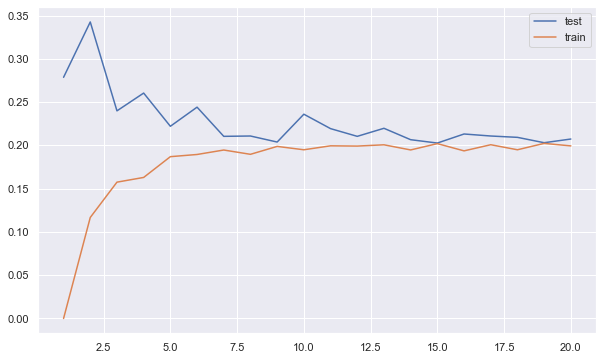

In [130]:
# Extracting the train and the test error for each k in a list for easy plotting

kltest = []
vltest = []
for k, v in knn_many_split.items():
    kltest.append(k)
    vltest.append(knn_many_split[k][1])

kltrain = []
vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)
    vltrain.append(knn_many_split[k][0])

# Plotting k vs error 
plt.figure(figsize=(10,6))
plt.plot(kltest,vltest, label = 'test' )
plt.plot(kltrain,vltrain, label = 'train')
plt.legend()
plt.show()

**Observations:**
- We can see that the train error and the test error are more or less similar for K more than or equal to 7.
- This implies that we would get generalized results if we choose K=7.
- So, let's scale the full data and fit the model on the entire training set. 

In [131]:
# scaling the data
scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)  #fit_transform the training data
X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns) #transform the testing data

In [132]:
#Fitting the model on the scaled data
knn = KNeighborsClassifier(n_neighbors = 7, weights='distance')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

**Now, let's check the performance of the model on the training and testing data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       298

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429



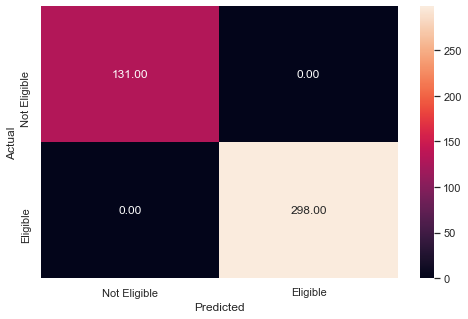

In [133]:
#predict on train data
y_pred_train_knn =  knn.predict(X_train_scaled)# write your code here

#checking performance of the model
metrics_score(y_train, y_pred_train_knn)

**Observations:____**

Jose Medina Observations

> - The model predicts extremely well with respect to the training set. We achieve 100% preciion and recall.
> - With performance like this, we need to be leery of over-fitting so we must check the results agains the TEST data set

              precision    recall  f1-score   support

           0       0.61      0.31      0.41        61
           1       0.73      0.90      0.81       124

    accuracy                           0.71       185
   macro avg       0.67      0.61      0.61       185
weighted avg       0.69      0.71      0.68       185



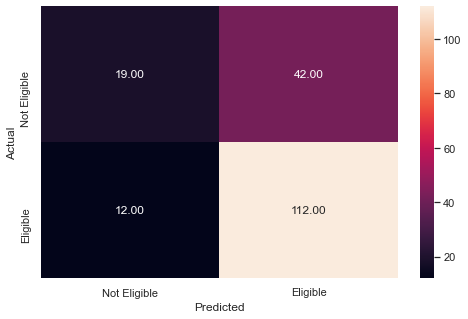

In [134]:
#predict on test data
y_pred_test_knn = knn.predict(X_test_scaled)# Write your code here

#checking performance of the model
metrics_score(y_test, y_pred_test_knn)

**Observation:____**

Jose Medina Observation

> **Test Data** performance indicates 73% precision, 90% recall, and 81% f1-score. This performance is worse than the results of the **Train Data** performance assessment.However we know that the TRAIN results point to overfitting.

We know from our earlier analysis that the typical loan has a mean of 141K. If we simplistically assume these loans would be approved blindly as a result of the model we'd be exposing the company to potential for 5.9MM in loan loss/risk (42 * 5.9MM). Additionally, we would be disqualifying 12 applications that would have been qualified. This is not only an opportunity cost ( we wold not be collecting interest on these loans), but also a risk for litigtation under fair lending laws and practices. 


## Conclusion:

Jose Medina Conclusions

We have tried multiple models and were able to identify the key factors affecting loan eligibility (Loan_Status: Loan approved (1 - Yes, 0 - No). 

We noted that top factors increasing the odds of loan elegibility includ
> - the required Credit_History (=1) is 21.3 times more likely to be approved for a loan than those are do NOT have the required credit history, per guidelines.
> - an application for a Semiurban property area is 2.07 times more likely to be approved for a loan than another property area type
> - Married_Yes (married inviduals) are 1.38 times more likely to get approved for a loan than those with other marital status
> - Dependents_2 (applicants with 2 dependants) are 1.22 times more likely to be approved for a loan than other dependent levels

Our final model, a K - Nearest Neighbors (KNN), achieves a precision of 73%, recall of 90%, and F1-Score of 81% for class=1


## Recommendations:


**The final model selection depends on a discussion with Easy House Finance Company.** However, if we assume that it is vitally important to them to be sensitive - and not let any potential loan slip away, they should use the model with highest recall, balancing precision (i.e. our model from Question 9 - K - Nearest Neighbors).

In loan application screening, it is vitally important to identify all elegible loans. However, as with any model, that will result in some loans that should have been approved to be denied, and some that should not have been approved to be approved.

I would recommend that this model be implemented with a few potential additions:
- Explore implementing an ensembling approach:
  -- implement the KNN
  -- then for both approved and declined loans that are near the threshold, further qualify these applicants with a model that uses augmented data sets to further qualify those loans (for example, ask the applicant for more detail on their finances)
- a "human-in-the-loop" to validate a random sample of denied and/or approved applicants. This would stil require far less manual effort than they were originally putting forth without our KNN model. This would serve a dual purpose of helping us create more feedback and training data for future model fine-tuning.

  
